# Bonus: Temperature Analysis I

In [1]:
import pandas as pd
from datetime import datetime as dt

In [2]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  19550 non-null  object 
 1   date     19550 non-null  object 
 2   prcp     18103 non-null  float64
 3   tobs     19550 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 611.1+ KB


In [3]:
# Convert the date column format from string to datetime
df['date']= pd.to_datetime(df['date'])
#verifying the date column changed to datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [4]:
# Set the date column as the DataFrame index

df.set_index('date', inplace=True)
df.head()

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73


In [13]:
# Drop the date column
df.reset_index(drop=True, inplace=True)
df.head()

,station,prcp,tobs
0,USC00519397,0.08,65
1,USC00519397,0.00,63
2,USC00519397,0.00,74
3,USC00519397,0.00,76
4,USC00519397,NaN,73


### Compare June and December data across all years 

In [14]:
from scipy import stats

In [47]:
# Filter data for desired months
df1=pd.read_csv('Resources/hawaii_measurements.csv')
df1['date']= pd.to_datetime(df1['date'])
df1.info()
#df_june=df1['date'][df1['date'].index.month == 6]
df1['month'] = pd.DatetimeIndex(df1['date']).month
df_june=df1[df1['month']==6]
df_dec=df1[df1['month']==12]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


,station,date,prcp,tobs,month
19323,USC00516128,2016-12-27,0.14,71,12
19324,USC00516128,2016-12-28,0.14,71,12
19325,USC00516128,2016-12-29,1.03,69,12
19326,USC00516128,2016-12-30,2.37,65,12
19327,USC00516128,2016-12-31,0.90,65,12


In [51]:
# Identify the average temperature for June
Avg_temp_june=df_june['tobs'].mean()
print(f'The average temperature in June:', round(Avg_temp_june,2))

The average temperature in June: 74.94


In [53]:
# Identify the average temperature for December
Avg_temp_Dec=df_dec['tobs'].mean()
print(f'The average temperature in June:', round(Avg_temp_Dec,2))

The average temperature in June: 71.04


In [70]:
# Create collections of temperature data
#print(df_june['tobs'])
print(df_dec['tobs'])

305      76
306      74
307      74
308      64
309      64
         ..
19323    71
19324    71
19325    69
19326    65
19327    65
Name: tobs, Length: 1517, dtype: int64


<AxesSubplot:ylabel='Frequency'>

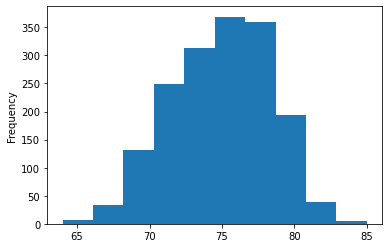

In [64]:
# Run paired t-test
df_june['tobs'].plot(kind='hist')


<AxesSubplot:ylabel='Frequency'>

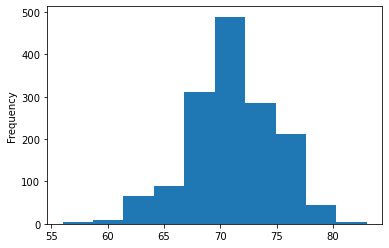

In [65]:
df_dec['tobs'].plot(kind='hist')

In [71]:
stats.ttest_rel(df_dec['tobs'].head(1500), df_june['tobs'].head(1500))

Ttest_relResult(statistic=-34.69833028869736, pvalue=3.864098966773339e-194)

### Analysis

In [ ]:
As per the analysis, the temperature difference is not much and as we can also see that only 3 degree of differenc in average temperature of June & December